#Importando o que importa

In [ ]:
!pip install teocomp -q
from teocomp.mt import MT
from teocomp.mt_ndmf import MTNDMF, S_BLK_BOX, S_BLK, S_BLK_U
from teocomp.mt_nd import MTND
from teocomp.mt_mf import MTMF

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.7 MB/s eta 0:00:00


## 1)  Para cada uma das linguagens abaixo, apresente os diagramas de estados para uma MT Determinística com uma fita:

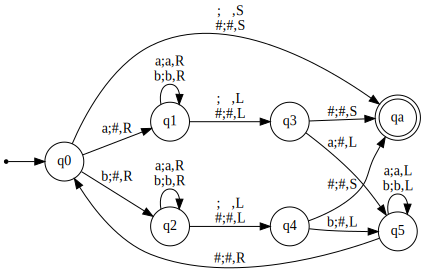

In [ ]:
#@title $L_1 = \{w \in \{a,b \}^*  \mid w \textit{ não é palíndromo} \}$
Q = {'q0','q1','q2','q3','q4', 'q5', 'qa'}
Sigma = {'a', 'b'}
blank='*'
Gamma = {'a', 'b', '#','*'}
delta = {
     ('q0','a') : ('q1','#','R'),
     ('q0','b') :  ('q2','#','R'),
     ('q0','*') : ('qa','*','S'),
     ('q0','#') : ('qa','#','S'),
     #
     ('q1','a') :  ('q1','a','R'),
     ('q1','b') :  ('q1','b','R'),
     ('q1','*') :  ('q3','*','L'),
     ('q1','#') :  ('q3','#','L'),
     #
     ('q2','a') :  ('q2','a','R'),
     ('q2','b') :  ('q2','b','R'),
     ('q2','*') :  ('q4','*','L'),
     ('q2','#') :  ('q4','#','L'),
     #
     ('q3','a') :  ('q5','#','L'),
     ('q3','#') :  ('qa','#','S'),
     #
     ('q4','b') :  ('q5','#','L'),
     ('q4','#') :  ('qa','#','S'),
     #
     ('q5','a') :  ('q5','a','L'),
     ('q5','b') :  ('q5','b','L'),
     ('q5','#') :  ('q0','#','R')
 }
q0 = 'q0'
F ={'qa'}
M_L1 = MT(Q,Sigma,Gamma,delta,q0,blank,F)
M_L1.visualizar()
#M_L1.visualizar(blank_as='Δ')



**Caso queira testar uma entrada específica, pode fazer como abaixo**

In [ ]:
print("A dedução da palavra aaaaaaaa na máquina de Turing da Linguagem L+0n1n={0n1n|n≥1}\n")
M_L1.acs=True)eita("abbba",show_step

A dedução da palavra aaaaaaaa na máquina de Turing da Linguagem L+0n1n={0n1n|n≥1}

q0abbba
#q1bbba
#bq1bba
#bbq1ba
#bbbq1a
#bbbaq1*
#bbbq3a*
#bbq5b#*
#bq5bb#*
#q5bbb#*
q5#bbb#*
#q0bbb#*
##q2bb#*
##bq2b#*
##bbq2#*
##bq4b#*
##q5b##*
#q5#b##*
##q0b##*
###q2##*
##q4###*
##qa###*


True

**Se quiser apenas o resultado...**

In [ ]:
M_L1.aceita("aaaaaaaa")

True

**Caso queira testar várias entradas ao mesmo tempo**

In [ ]:
def is_palindrome(s):
    """Verifica se a string s é um palíndromo."""
    return s == s[::-1]

def generate_strings(alphabet, max_length):
    """Gera todas as strings de até max_length caracteres no alfabeto dado."""
    from itertools import product

    strings = []
    for length in range(1, max_length + 1):
        for chars in product(alphabet, repeat=length):
            strings.append(''.join(chars))
    return strings

def main():
    alphabet = {'a', 'b'}
    max_length = 6

    # Gera todas as strings de até 6 caracteres
    strings = generate_strings(alphabet, max_length)

    # Verifica se cada string é um palíndromo e imprime no formato 'w' : X
    for w in strings:
        print(f"'{w}' : {is_palindrome(w)},")

if __name__ == "__main__":
    main()



'b' : True,
'a' : True,
'bb' : True,
'ba' : False,
'ab' : False,
'aa' : True,
'bbb' : True,
'bba' : False,
'bab' : True,
'baa' : False,
'abb' : False,
'aba' : True,
'aab' : False,
'aaa' : True,
'bbbb' : True,
'bbba' : False,
'bbab' : False,
'bbaa' : False,
'babb' : False,
'baba' : False,
'baab' : True,
'baaa' : False,
'abbb' : False,
'abba' : True,
'abab' : False,
'abaa' : False,
'aabb' : False,
'aaba' : False,
'aaab' : False,
'aaaa' : True,
'bbbbb' : True,
'bbbba' : False,
'bbbab' : False,
'bbbaa' : False,
'bbabb' : True,
'bbaba' : False,
'bbaab' : False,
'bbaaa' : False,
'babbb' : False,
'babba' : False,
'babab' : True,
'babaa' : False,
'baabb' : False,
'baaba' : False,
'baaab' : True,
'baaaa' : False,
'abbbb' : False,
'abbba' : True,
'abbab' : False,
'abbaa' : False,
'ababb' : False,
'ababa' : True,
'abaab' : False,
'abaaa' : False,
'aabbb' : False,
'aabba' : False,
'aabab' : False,
'aabaa' : True,
'aaabb' : False,
'aaaba' : False,
'aaaab' : False,
'aaaaa' : True,
'bbbbbb' : True,
'

In [ ]:
casos_testes ={
    '':True,
    'b' : True,
    'a' : True,
    'bb' : True,
    'ba' : False,
    'ab' : False,
    'aa' : True,
    'bbb' : True,
'bba' : False,
'bab' : True,
'baa' : False,
'abb' : False,
'aba' : True,
'aab' : False,
'aaa' : True,
'bbbb' : True,
'bbba' : False,
'bbab' : False,
'bbaa' : False,
'babb' : False,
'baba' : False,
'baab' : True,
'baaa' : False,
'abbb' : False,
'abba' : True,
'abab' : False,
'abaa' : False,
'aabb' : False,
'aaba' : False,
'aaab' : False,
'aaaa' : True,
'bbbbb' : True,
'bbbba' : False,
'bbbab' : False,
'bbbaa' : False,
'bbabb' : True,
'bbaba' : False,
'bbaab' : False,
'bbaaa' : False,
'babbb' : False,
'babba' : False,
'babab' : True,
'babaa' : False,
'baabb' : False,
'baaba' : False,
'baaab' : True,
'baaaa' : False,
'abbbb' : False,
'abbba' : True,
'abbab' : False,
'abbaa' : False,
'ababb' : False,
'ababa' : True,
'abaab' : False,
'abaaa' : False,
'aabbb' : False,
'aabba' : False,
'aabab' : False,
'aabaa' : True,
'aaabb' : False,
'aaaba' : False,
'aaaab' : False,
'aaaaa' : True,
'bbbbbb' : True,
'bbbbba' : False,
'bbbbab' : False,
'bbbbaa' : False,
'bbbabb' : False,
'bbbaba' : False,
'bbbaab' : False,
'bbbaaa' : False,
'bbabbb' : False,
'bbabba' : False,
'bbabab' : False,
'bbabaa' : False,
'bbaabb' : True,
'bbaaba' : False,
'bbaaab' : False,
'bbaaaa' : False,
'babbbb' : False,
'babbba' : False,
'babbab' : True,
'babbaa' : False,
'bababb' : False,
'bababa' : False,
'babaab' : False,
'babaaa' : False,
'baabbb' : False,
'baabba' : False,
'baabab' : False,
'baabaa' : False,
'baaabb' : False,
'baaaba' : False,
'baaaab' : True,
'baaaaa' : False,
'abbbbb' : False,
'abbbba' : True,
'abbbab' : False,
'abbbaa' : False,
'abbabb' : False,
'abbaba' : False,
'abbaab' : False,
'abbaaa' : False,
'ababbb' : False,
'ababba' : False,
'ababab' : False,
'ababaa' : False,
'abaabb' : False,
'abaaba' : True,
'abaaab' : False,
'abaaaa' : False,
'aabbbb' : False,
'aabbba' : False,
'aabbab' : False,
'aabbaa' : True,
'aababb' : False,
'aababa' : False,
'aabaab' : False,
'aabaaa' : False,
'aaabbb' : False,
'aaabba' : False,
'aaabab' : False,
'aaabaa' : False,
'aaaabb' : False,
'aaaaba' : False,
'aaaaab' : False,
'aaaaaa' : True
}
M_L1.display_resultados(casos_testes)

Acertou 100.00% (127 de 127)


,Palavra,Esperado,Resultado
0,,True,True
1,b,True,True
2,a,True,True
3,bb,True,True
4,ba,False,False
...,...,...,...
122,aaabaa,False,False
123,aaaabb,False,False
124,aaaaba,False,False
125,aaaaab,False,False


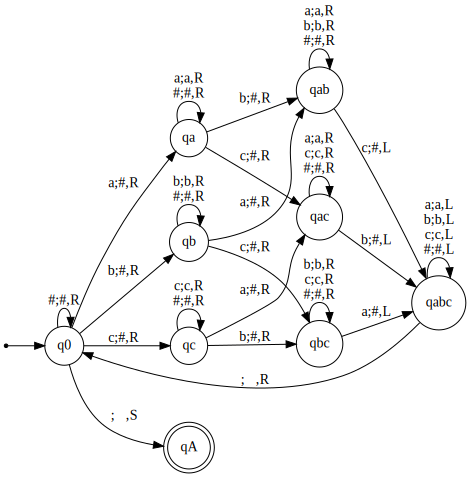

In [ ]:
#@title $L_2 = \{w \in \{a, b, c \}^* \mid n_a(w) = n_b(w) = n_c(w)\}$
Q = {'q0','qa','qb','qc','qab', 'qac', 'qbc', 'qabc', 'qA'}
Sigma = {'a', 'b', 'c'}
blank='*'
Gamma = {'a', 'b', 'c','#','*'}
delta = {
     ('q0','a') : ('qa','#','R'),
     ('q0','b') :  ('qb','#','R'),
     ('q0','c') :  ('qc','#','R'),
     ('q0','*') : ('qA','*','S'),
     ('q0','#') : ('q0','#','R'),
     #
     ('qa','a') :  ('qa','a','R'),
     ('qa','b') :  ('qab','#','R'),
     ('qa','c') :  ('qac','#','R'),
     ('qa','#') :  ('qa','#','R'),
     #
     ('qb','a') :  ('qab','#','R'),
     ('qb','b') :  ('qb','b','R'),
     ('qb','c') :  ('qbc','#','R'),
     ('qb','#') :  ('qb','#','R'),
     #
     ('qc','a') :  ('qac','#','R'),
     ('qc','b') :  ('qbc','#','R'),
     ('qc','c') :  ('qc','c','R'),
     ('qc','#') :  ('qc','#','R'),
     #
     ('qab','a') :  ('qab','a','R'),
     ('qab','b') :  ('qab','b','R'),
     ('qab','c') :  ('qabc','#','L'),
     ('qab','#') :  ('qab','#','R'),
     #
     ('qac','a') :  ('qac','a','R'),
     ('qac','b') :  ('qabc','#','L'),
     ('qac','c') :  ('qac','c','R'),
     ('qac','#') :  ('qac','#','R'),
     #
     ('qbc','a') :  ('qabc','#','L'),
     ('qbc','b') :  ('qbc','b','R'),
     ('qbc','c') :  ('qbc','c','R'),
     ('qbc','#') :  ('qbc','#','R'),
     #
     ('qabc','a') :  ('qabc','a','L'),
     ('qabc','b') :  ('qabc','b','L'),
     ('qabc','c') :  ('qabc','c','L'),
     ('qabc','#') :  ('qabc','#','L'),
     ('qabc','*') :  ('q0','*','R')
 }
q0 = 'q0'
F ={'qA'}
M_L2 = MT(Q,Sigma,Gamma,delta,q0,blank,F)
M_L2.visualizar()


In [ ]:
#@title Fazendo os testes
from itertools import product

# Função para verificar se o número de 'a's, 'b's e 'c's são iguais
def check_equal_counts(s):
    return s.count('a') == s.count('b') == s.count('c')

# Variável para armazenar os pares 'w' : X
casos_testes = {}

# Gerar todas as strings de até 6 caracteres no alfabeto {a, b, c}
alfabeto = ['a', 'b', 'c']

# Incluindo a string vazia
casos_testes[""] = True

# Gerar strings de comprimento 1 a 6
for length in range(1, 7):
    for w in product(alfabeto, repeat=length):
        string = ''.join(w)
        casos_testes[string] = check_equal_counts(string)

# Exibir os resultados
M_L2.display_resultados(casos_testes)


Acertou 100.00% (1093 de 1093)


,Palavra,Esperado,Resultado
0,,True,True
1,a,False,False
2,b,False,False
3,c,False,False
4,aa,False,False
...,...,...,...
1088,ccccbb,False,False
1089,ccccbc,False,False
1090,ccccca,False,False
1091,cccccb,False,False


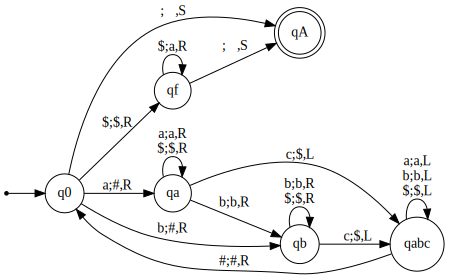

In [ ]:
#@title $L_3 = \{a^ib^jc^k \mid i + j = k\}$
Q = {'q0','qa','qb','qabc','qf','qA'}
Sigma = {'a', 'b', 'c'}
blank='*'
Gamma = {'a', 'b', 'c','#','$','*'}
delta = {
     ('q0','a') : ('qa','#','R'),
     ('q0','b') :  ('qb','#','R'),
     ('q0','$') : ('qf','$','R'),
     ('q0','*') : ('qA','*','S'),
     #
     ('qa','a') :  ('qa','a','R'),
     ('qa','b') :  ('qb','b','R'),
     ('qa','c') :  ('qabc','$','L'),
     ('qa','$') :  ('qa','$','R'),
     #
     ('qb','b') :  ('qb','b','R'),
     ('qb','c') :  ('qabc','$','L'),
     ('qb','$') :  ('qb','$','R'),
     #
     ('qabc','a') :  ('qabc','a','L'),
     ('qabc','b') :  ('qabc','b','L'),
     ('qabc','$') :  ('qabc','$','L'),
     ('qabc','#') :  ('q0','#','R'),
     #
     ('qf','$') :  ('qf','a','R'),
     ('qf','*') : ('qA','*','S')
 }
q0 = 'q0'
F ={'qA'}
M_L3 = MT(Q,Sigma,Gamma,delta,q0,blank,F)
M_L3.visualizar()

In [ ]:
M_L3.aceita("abc")

False

In [ ]:
#@title Fazendo o teste
from itertools import product

# Função para verificar se a string está no formato a^i b^j c^{i+j}
def check_pattern(s):
    """Verifica se a string s está no padrão a^i b^j c^k."""
    if not s:
        return True  # String vazia é válida (i = j = k = 0)

    # Divide a string em três partes: a's, b's e c's
    i = 0
    while i < len(s) and s[i] == 'a':
        i += 1

    j = 0
    while i + j < len(s) and s[i + j] == 'b':
        j += 1

    k = 0
    while i + j + k < len(s) and s[i + j + k] == 'c':
        k += 1

    # Verifica se toda a string foi processada
    if (i + j + k == len(s)) and (i + j == k):
      return True
    else: return False

# Variável para armazenar os pares 'w' : X
casos_testes = {}

# Gerar todas as strings de até 6 caracteres no alfabeto {a, b, c}
alfabeto = ['a', 'b', 'c']

# Incluindo a string vazia
casos_testes[""] = True

# Gerar strings de comprimento 1 a 6
for length in range(1, 7):
    for w in product(alfabeto, repeat=length):
        string = ''.join(w)
        casos_testes[string] = check_pattern(string)

# Exibir os resultados
M_L3.display_resultados(casos_testes)


Acertou 100.00% (1093 de 1093)


,Palavra,Esperado,Resultado
0,,True,True
1,a,False,False
2,b,False,False
3,c,False,False
4,aa,False,False
...,...,...,...
1088,ccccbb,False,False
1089,ccccbc,False,False
1090,ccccca,False,False
1091,cccccb,False,False


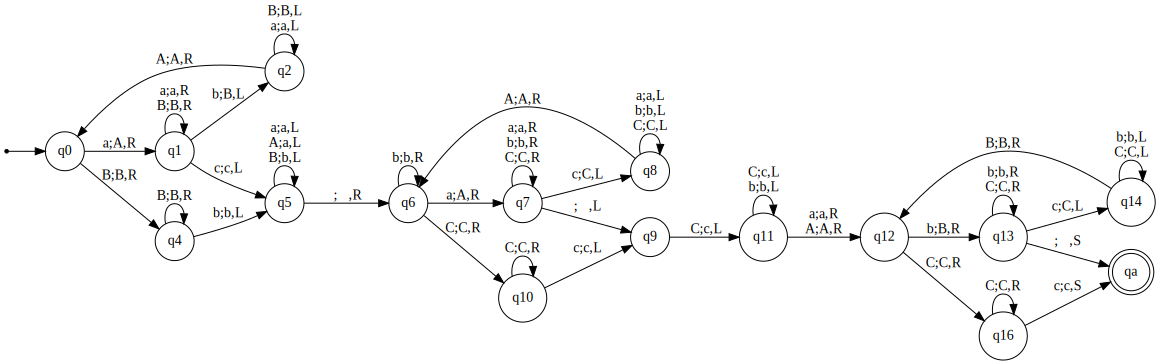

In [ ]:
#@title $L_4 = \{a^ib^jc^k \mid i, j, k > 0 \textit{ e } i \neq j \neq k\}$
Q = {'q0','q1','q2','q4','q5','q6','q7','q8','q9', 'q10','q11','q12','q13','q14','q16','qa'}
Sigma = {'a', 'b', 'c'}
blank='*'
Gamma = {'a', 'b', 'c','A','B','C','*'}
delta = {
     ('q0','a') : ('q1','A','R'),
     ('q0','B') : ('q4','B','R'),

     #
     ('q1','a') :  ('q1','a','R'),
     ('q1','B') :  ('q1','B','R'),
     ('q1','b') :  ('q2','B','L'),
     ('q1','c') :  ('q5','c','L'),
     #
     ('q2','B') :  ('q2','B','L'),
     ('q2','a') :  ('q2','a','L'),
     ('q2','A') :  ('q0','A','R'),
     #
     ('q4','B') :  ('q4','B','R'),
     ('q4','b') :  ('q5','b','L'),
     #
     ('q5','a') :  ('q5','a','L'),
     ('q5','A') :  ('q5','a','L'),
     ('q5','B') :  ('q5','b','L'),
     ('q5','*') :  ('q6','*','R'),
     #
     ('q6','a') : ('q7','A','R'),
     ('q6','b') : ('q6','b','R'),
     ('q6','C') : ('q10','C','R'),
     #
     ('q7','a') :  ('q7','a','R'),
     ('q7','b') :  ('q7','b','R'),
     ('q7','C') :  ('q7','C','R'),
     ('q7','c') :  ('q8','C','L'),
     ('q7','*') :  ('q9','*','L'),
     #
     ('q8','a') :  ('q8','a','L'),
     ('q8','b') :  ('q8','b','L'),
     ('q8','C') :  ('q8','C','L'),
     ('q8','A') :  ('q6','A','R'),
        #
     ('q9','C') :  ('q11','c','L'),
     #
     ('q10','C') :  ('q10','C','R'),
     ('q10','c') :  ('q9','c','L'),
     #
     ('q11','C') :  ('q11','c','L'),
     ('q11','b') :  ('q11','b','L'),
     ('q11','a') :  ('q12','a','R'),
     ('q11','A') :  ('q12','A','R'),
     #
     ('q12','b') :  ('q13','B','R'),
     ('q12','C') :  ('q16','C','R'),
     #
     ('q13','b') :  ('q13','b','R'),
     ('q13','C') :  ('q13','C','R'),
     ('q13','c') :  ('q14','C','L'),
     ('q13','*') :  ('qa','*','S'),
     #
     ('q14','b') :  ('q14','b','L'),
     ('q14','C') :  ('q14','C','L'),
     ('q14','B') :  ('q12','B','R'),
     #
     ('q16','C') :  ('q16','C','R'),
     ('q16','c') :  ('qa','c','S'),
     #

 }
q0 = 'q0'
F ={'qa'}
M_L4 = MT(Q,Sigma,Gamma,delta,q0,blank,F)
M_L4.visualizar()

In [ ]:
#@title Fazendo teste
from itertools import product

# Função para verificar se a string está no formato a^i b^j c^k com i ≠ j, i ≠ k, j ≠ k, i > 0, j > 0 e k > 0
def check_pattern(s):
    """Verifica se a string s está no padrão a^i b^j c^k com i ≠ j, i ≠ k, j ≠ k, i > 0, j > 0 e k > 0."""
    if not s:
        return False  # String vazia não é válida para i > 0, j > 0 e k > 0

    # Divide a string em três partes: a's, b's e c's
    i = 0
    while i < len(s) and s[i] == 'a':
        i += 1

    j = 0
    while i + j < len(s) and s[i + j] == 'b':
        j += 1

    k = 0
    while i + j + k < len(s) and s[i + j + k] == 'c':
        k += 1

    # Verifica se toda a string foi processada e se i ≠ j, i ≠ k, j ≠ k, i > 0, j > 0 e k > 0
    return (i + j + k == len(s)) and (i != j) and (i != k) and (j != k) and (i > 0) and (j > 0) and (k > 0)

# Variável para armazenar os pares 'w' : X
casos_testes = {}

# Gerar todas as strings de até 6 caracteres no alfabeto {a, b, c}
alfabeto = ['a', 'b', 'c']

# Incluindo a string vazia
casos_testes[""] = check_pattern("")  # String vazia não é válida para i > 0, j > 0 e k > 0

# Gerar strings de comprimento 1 a 6
for length in range(1, 7):
    for w in product(alfabeto, repeat=length):
        string = ''.join(w)
        casos_testes[string] = check_pattern(string)

# Exibir os resultados
M_L4.display_resultados(casos_testes)

Acertou 100.00% (1093 de 1093)


,Palavra,Esperado,Resultado
0,,False,False
1,a,False,False
2,b,False,False
3,c,False,False
4,aa,False,False
...,...,...,...
1088,ccccbb,False,False
1089,ccccbc,False,False
1090,ccccca,False,False
1091,cccccb,False,False
